# pyaudio 패키지로 sine wave 소리 만들기

참고: https://en.wikipedia.org/wiki/List_of_intervals_in_5-limit_just_intonation

pip install pyaudio

주의: pyaudio가 깔리지 않으면 Visual Studio 깔아주기..

## import

In [3]:
import pyaudio
import numpy as np

## 소리 생성 및 play!

In [38]:
%%time

p = pyaudio.PyAudio()

def note(f, duration, fps):
    # generate samples, note conversion to float32 array
    root = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f / fps), dtype=np.float32)
    return root


def major_triad(f, duration, fps):
    # generate samples, note conversion to float32 array
    root = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f / fps), dtype=np.float32)
    third = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(5/4) / fps), dtype=np.float32)
    fifth = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(3/2) / fps), dtype=np.float32)
    major = (root + third + fifth)/3
    return major


def minor_triad(f, duration, fps):
    # generate samples, note conversion to float32 array
    root = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f / fps), dtype=np.float32)
    third = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(6/5) / fps), dtype=np.float32)
    fifth = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(3/2) / fps), dtype=np.float32)
    minor = (root + third + fifth)/3
    return minor


def major_scale(f, duration, fps):
    # generate samples, note conversion to float32 array
    noise = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f/2 / fps), dtype=np.float32)/10
    root = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f / fps), dtype=np.float32) + noise
    second = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(9/8) / fps), dtype=np.float32) + noise
    third = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(5/4) / fps), dtype=np.float32) + noise
    fourth = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(4/3) / fps), dtype=np.float32) + noise
    fifth = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(3/2) / fps), dtype=np.float32) + noise
    sixth = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(5/3) / fps), dtype=np.float32) + noise
    seventh = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(15/8) / fps), dtype=np.float32) + noise
    octave = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*2 / fps), dtype=np.float32) + noise
    scale = np.append(root/2, [second/2, third/2, fourth/2, fifth/2, sixth/2, seventh/2, octave/2])
    return scale


def minor_scale(f, duration, fps):
    # generate samples, note conversion to float32 array
    noise = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f/2 / fps), dtype=np.float32)/10
    root = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f / fps), dtype=np.float32) + noise
    second = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(9/8) / fps), dtype=np.float32) + noise
    third = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(6/5) / fps), dtype=np.float32) + noise
    fourth = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(4/3) / fps), dtype=np.float32) + noise
    fifth = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(3/2) / fps), dtype=np.float32) + noise
    sixth = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(8/5) / fps), dtype=np.float32) + noise
    seventh = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*(9/5) / fps), dtype=np.float32) + noise
    octave = np.array(np.sin(2 * np.pi * np.arange(fps * duration) * f*2 / fps), dtype=np.float32) + noise
    scale = np.append(root/2, [second/2, third/2, fourth/2, fifth/2, sixth/2, seventh/2, octave/2])
    return scale


# sine frequency, Hz, may be float
f = 250.0
# in seconds, may be float
duration = 0.5
# sampling rate, Hz, must be integer
# fps == Frame Per Second
fps = 48000 # sounds a lot better.. 44100 causes some kind of ringing noise
major = major_triad(f, duration, fps)
minor = minor_triad(f, duration, fps)
ascend = minor_scale(f, duration, fps)

def play(sample, repeat=1):
    # for paFloat32 sample values must be in range [-1.0, 1.0]
    stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=fps,
                    output=True)
    for n in range(repeat):
        stream.write(sample.tobytes())
    stream.stop_stream()
    stream.close()
    p.terminate()
    return True

play(ascend, 2)

Wall time: 8.3 s


## 소리 분석

In [9]:
import matplotlib.pyplot as plt

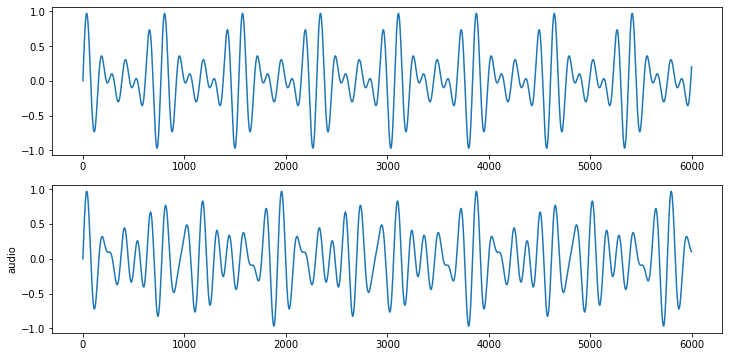

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(major[:6000])
plt.subplot(212)
plt.plot(minor[:6000])
plt.ylabel('audio')
plt.show()

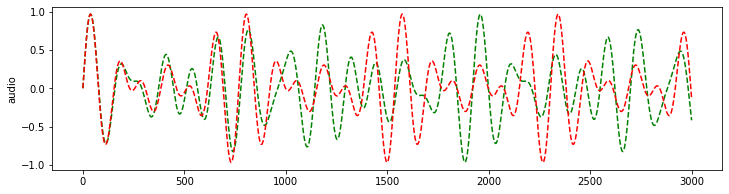

In [49]:
plt.figure(figsize=(12, 3))
plt.plot(minor[:3000], 'g--', major[:3000], 'r--')
plt.ylabel('audio')
plt.show()